# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

sensor.isnull().mean()

attitude.roll         0.0
attitude.pitch        0.0
attitude.yaw          0.0
gravity.x             0.0
gravity.y             0.0
gravity.z             0.0
rotationRate.x        0.0
rotationRate.y        0.0
rotationRate.z        0.0
userAcceleration.x    0.0
userAcceleration.y    0.0
userAcceleration.z    0.0
dtype: float64

How many rows and columns are in our data?

In [5]:
# Your code here:

print("Columns:",len(sensor.columns),"Rows:",len(sensor.index))

Columns: 12 Rows: 1751


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:
dr = pd.date_range(start="2018-01-01 00:00:00",end="2018-01-01 00:29:10",periods=1751)

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:

sensor.index = dr
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


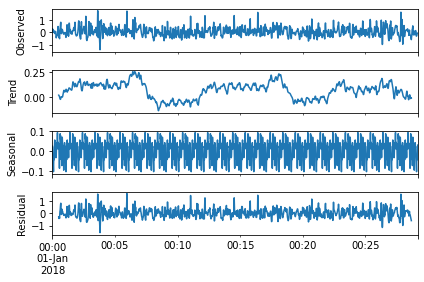

In [8]:
# Your code here:

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

data = sensor["userAcceleration.x"]
res = sm.tsa.seasonal_decompose(x=data,freq=60)
res.plot()
print("")

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

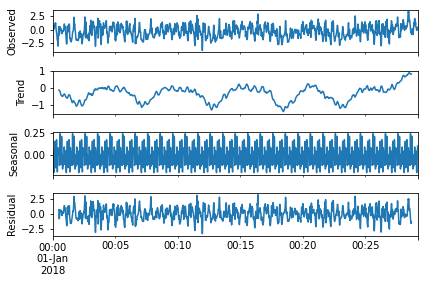

In [9]:
data1 = sensor["rotationRate.x"]
res = sm.tsa.seasonal_decompose(x=data1,freq=60)
res.plot()
print("")

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

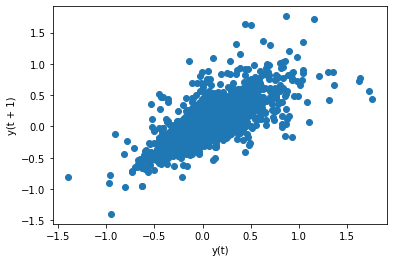

In [10]:
# Your code here:

pd.plotting.lag_plot(data)

Create a lag plot for `rotationRate.x`

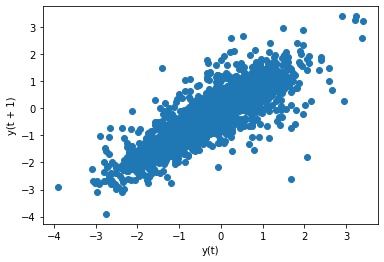

In [11]:
# Your code here:

pd.plotting.lag_plot(data1)

What are your conclusions from both visualizations?

*With pandas lag_plot we can see the corr between a variable at time x and the same var at just its previous time (in this case seconds)*
*Both plots indicate a positive corr between their points. However the rotationRate.x is more correlated than userAcceleration.x*
*Finally, as thay are correlated, it means they can be modeled*


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [12]:
#ADF test determine if your time series is stationary

#A time series is stationary if a single shift in time doesn’t change the time series statistical properties (mean,var), 
#in which case unit root does not exist.

#h0 there is presence of unit root = not stationary
from statsmodels.tsa.stattools import adfuller as ADF

#for userAcceleration.x
if ADF(data)[1] < 0.05:
    print(f"We can reject h0 at a 5% sig level and assume the series userAcceleration.x is stationary with a p-value of {ADF(data)[1]}")
else:
    print("We cannot reject h0, so we assume our series is not stationay")
    
#for rotationRate.x
if ADF(data1)[1] < 0.05:
    print(f"We can reject h0 at a 5% sig level and assume the series rotationRate.x is stationary with a p-value of {ADF(data1)[1]}")
else:
    print("We cannot reject h0, so we assume our series is not stationay")

We can reject h0 at a 5% sig level and assume the series userAcceleration.x is stationary with a p-value of 2.823439483037483e-30
We can reject h0 at a 5% sig level and assume the series rotationRate.x is stationary with a p-value of 6.320230335912605e-06


What are your conclusions from this test?

In [13]:
# Your conclusions here:

#above

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [14]:
# Your code here:

from statsmodels.tsa.arima_model import ARMA

train = sensor["userAcceleration.x"][:1741]
test = sensor["userAcceleration.x"][1741:]

model = ARMA(train, order=(2,1)).fit()
y_pred = model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
y_pred

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
Freq: S, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [15]:
# Your code here:
from sklearn.metrics import mean_squared_error as MSE

results = pd.DataFrame({
    "GT":test,
    "pred":y_pred,
    "diff":y_pred-test
})
print("MSE = ",round(MSE(test,y_pred),5))
print("RMSE = ",np.sqrt(MSE(test,y_pred)))
display(results)


MSE =  0.05076
RMSE =  0.2252986422400622


,GT,pred,diff
2018-01-01 00:29:01,0.149749,0.173149,0.023400
2018-01-01 00:29:02,0.038461,0.142896,0.104435
2018-01-01 00:29:03,-0.169175,0.100522,0.269697
2018-01-01 00:29:04,-0.300361,0.070106,0.370467
2018-01-01 00:29:05,-0.270174,0.056099,0.326273
2018-01-01 00:29:06,-0.268367,0.053778,0.322145
2018-01-01 00:29:07,-0.102444,0.056790,0.159234
2018-01-01 00:29:08,-0.085590,0.060646,0.146236
2018-01-01 00:29:09,-0.048105,0.063316,0.111421
2018-01-01 00:29:10,-0.065011,0.064493,0.129504


In [16]:
#Althought just by checking the MSE and RMSE we could consider the avg error is low, the reality is that
#by checking the range of userAcceleration.x, an avg RMSE of 0.25 is really high

print("Max:",sensor["userAcceleration.x"].describe())

Max: count    1751.000000
mean        0.062493
std         0.343783
min        -1.398820
25%        -0.173231
50%         0.037187
75%         0.261624
max         1.760975
Name: userAcceleration.x, dtype: float64


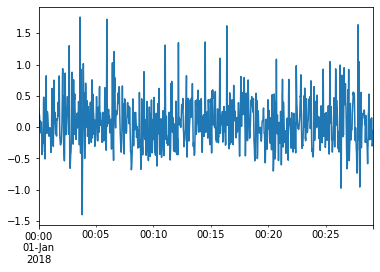

In [19]:
accX = sensor["userAcceleration.x"]
accX.plot()

He estado mirando un poco los datos con los que tratabamos y claro tiene logica que la aceleracion de x, es decir la horizontal sobre la pantalla del movil, suela rondar 0 (mean,median), porque habra muchos momentos en los que la persona tenga la mano quieta. Por tanto es loigoc que de estacionario.

Luego entiendo que la parte de la mala prediccion de datos puede venir por muchas cosas, el ruido, la alta correlacion que tiene que tener aceleracion x, con z e y o que no haya suficicientes datos (aunque media hora en una persona en una pantalla puede ser bastante).

En definitiva, un lab muy interesante pero tendriamos que profundizar un mes para sacar buenos resultados en esta materia

pd: he ploteado el accX para verla un poco mejor y hacerme a la idea, al igual que con que pd.describe